In [1]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
conn = sqlite3.connect('C:\\Users\\anith\\Downloads\\mimic.db')

In [3]:
conn.execute('select name from sqlite_master where type = \'table\'').fetchall()

[('admissions',),
 ('callout',),
 ('caregivers',),
 ('chartevents',),
 ('cptevents',),
 ('d_cpt',),
 ('d_icd_diagnoses',),
 ('d_icd_procedures',),
 ('d_items',),
 ('diagnoses_icd',),
 ('drgcodes',),
 ('icustays',),
 ('inputevents_cv',),
 ('inputevents_mv',),
 ('labevents',),
 ('microbiologyevents',),
 ('noteevents',),
 ('outputevents',),
 ('patients',),
 ('prescriptions',),
 ('procedureevents_mv',),
 ('procedures_icd',),
 ('services',),
 ('transfers',),
 ('d_labitems',),
 ('datetimeevents',)]

In [4]:
df = pd.read_sql('select * from admissions', conn)
df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,,CATHOLIC,MARRIED,WHITE,,,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,,,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,,PROTESTANT QUAKER,SINGLE,WHITE,,,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,,,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
ROW_ID                  58976 non-null object
SUBJECT_ID              58976 non-null object
HADM_ID                 58976 non-null object
ADMITTIME               58976 non-null object
DISCHTIME               58976 non-null object
DEATHTIME               58976 non-null object
ADMISSION_TYPE          58976 non-null object
ADMISSION_LOCATION      58976 non-null object
DISCHARGE_LOCATION      58976 non-null object
INSURANCE               58976 non-null object
LANGUAGE                58976 non-null object
RELIGION                58976 non-null object
MARITAL_STATUS          58976 non-null object
ETHNICITY               58976 non-null object
EDREGTIME               58976 non-null object
EDOUTTIME               58976 non-null object
DIAGNOSIS               58976 non-null object
HOSPITAL_EXPIRE_FLAG    58976 non-null object
HAS_CHARTEVENTS_DATA    58976 non-null object
dtypes: object(19

In [6]:
uniqueAdmission=df['HADM_ID'].nunique()
print(uniqueAdmission)
uniquepatients=df['SUBJECT_ID'].nunique()
print(uniquepatients)

58976
46520


In [7]:
type(df['DISCHTIME'])

pandas.core.series.Series

In [8]:
df["DISCHTIME"] = pd.to_datetime(df["DISCHTIME"])
df["ADMITTIME"] = pd.to_datetime(df["ADMITTIME"])
df["ADMITTIME"]

0       2196-04-09 12:26:00
1       2153-09-03 07:15:00
2       2157-10-18 19:34:00
3       2139-06-06 16:14:00
4       2160-11-02 02:06:00
                ...        
58971   2131-03-30 21:13:00
58972   2151-03-05 20:00:00
58973   2200-09-12 07:15:00
58974   2128-11-11 02:29:00
58975   2131-10-25 03:09:00
Name: ADMITTIME, Length: 58976, dtype: datetime64[ns]

In [9]:
df['LOS'] = (df['DISCHTIME'] - df['ADMITTIME']).dt.total_seconds()/86400
df['LOS']

0         1.144444
1         5.496528
2         6.768056
3         2.856944
4         3.534028
           ...    
58971     2.742361
58972     0.548611
58973     8.203472
58974    41.445833
58975     1.607639
Name: LOS, Length: 58976, dtype: float64

In [10]:
df[['ADMITTIME', 'DISCHTIME', 'LOS']]

,ADMITTIME,DISCHTIME,LOS
0,2196-04-09 12:26:00,2196-04-10 15:54:00,1.144444
1,2153-09-03 07:15:00,2153-09-08 19:10:00,5.496528
2,2157-10-18 19:34:00,2157-10-25 14:00:00,6.768056
3,2139-06-06 16:14:00,2139-06-09 12:48:00,2.856944
4,2160-11-02 02:06:00,2160-11-05 14:55:00,3.534028
...,...,...,...
58971,2131-03-30 21:13:00,2131-04-02 15:02:00,2.742361
58972,2151-03-05 20:00:00,2151-03-06 09:10:00,0.548611
58973,2200-09-12 07:15:00,2200-09-20 12:08:00,8.203472
58974,2128-11-11 02:29:00,2128-12-22 13:11:00,41.445833


In [11]:
df['LOS'].describe()

count    58976.000000
mean        10.133916
std         12.456682
min         -0.945139
25%          3.743750
50%          6.467014
75%         11.795139
max        294.660417
Name: LOS, dtype: float64

In [12]:
df[df['LOS']<0]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LOS
425,534,417,102633,2177-03-23 16:17:00,2177-03-23 07:20:00,2177-03-23 07:20:00,URGENT,PHYS REFERRAL/NORMAL DELI,DEAD/EXPIRED,Private,,UNOBTAINABLE,MARRIED,WHITE,,,ORGAN DONOR ACCOUNT,1,1,-0.372917
456,237,181,102631,2153-10-12 09:49:00,2153-10-12 06:29:00,2153-10-12 06:29:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,,PROTESTANT QUAKER,MARRIED,WHITE,2153-10-12 06:23:00,2153-10-12 07:45:00,DISSECTING ANEURYSIM,1,1,-0.138889
692,644,516,187482,2197-07-31 20:18:00,2197-07-31 01:10:00,2197-07-31 01:10:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,,JEWISH,WIDOWED,UNKNOWN/NOT SPECIFIED,2197-07-31 11:31:00,2197-07-31 14:35:00,RESPIRATORY DISTRESS,1,0,-0.797222
1911,1640,1334,138015,2137-09-02 14:43:00,2137-09-02 12:00:00,2137-09-02 12:00:00,NEWBORN,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,,PROTESTANT QUAKER,,WHITE,,,NEWBORN,1,1,-0.113194
1970,1699,1381,181430,2189-01-02 14:25:00,2189-01-02 12:00:00,2189-01-02 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,,UNOBTAINABLE,MARRIED,WHITE,2189-01-02 10:31:00,2189-01-02 15:56:00,STROKE;TELEMETRY,1,1,-0.100694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57233,57980,96810,165589,2103-09-25 20:38:00,2103-09-25 12:00:00,2103-09-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicaid,RUSS,UNOBTAINABLE,WIDOWED,WHITE,2103-09-25 19:27:00,2103-09-25 21:37:00,CARDIAC ARREST,1,1,-0.359722
57559,58635,98943,193747,2164-11-14 20:03:00,2164-11-14 12:00:00,2164-11-14 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,UNOBTAINABLE,MARRIED,WHITE,2164-11-14 18:24:00,2164-11-14 20:54:00,INTRACRANIAL HEMORRHAGE,1,1,-0.335417
57902,58720,99207,191004,2143-07-06 19:59:00,2143-07-06 12:00:00,2143-07-06 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicaid,ENGL,CATHOLIC,DIVORCED,WHITE,2143-07-06 19:30:00,2143-07-06 20:05:00,GSW L. CHEST WALL & ABDOMEN,1,1,-0.332639
58346,55950,90642,101946,2122-04-24 14:36:00,2122-04-24 12:00:00,2122-04-24 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,,CATHOLIC,MARRIED,UNABLE TO OBTAIN,,,ST-SEGMENT ELEVATION MYOCARDIAL INFARCTION\CATH,1,1,-0.108333


In [13]:
df[df['DISCHARGE_LOCATION']=='DEAD/EXPIRED']

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LOS
9,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,,CATHOLIC,MARRIED,WHITE,,,STATUS EPILEPTICUS,1,1,7.647917
57,55,56,181711,2104-01-02 02:01:00,2104-01-08 10:30:00,2104-01-08 10:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,,NOT SPECIFIED,,WHITE,2104-01-01 23:59:00,2104-01-02 03:33:00,HEAD BLEED,1,1,6.353472
63,61,61,189535,2119-01-04 18:12:00,2119-02-03 01:35:00,2119-02-03 01:35:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,,CATHOLIC,MARRIED,WHITE,,,NON-HODGKINS LYMPHOMA;FEBRILE;NEUTROPENIA,1,1,29.307639
70,68,67,155252,2157-12-02 00:45:00,2157-12-02 03:55:00,2157-12-02 03:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,,JEWISH,SINGLE,WHITE,2157-12-01 20:45:00,2157-12-02 00:55:00,SUBARACHNOID HEMORRHAGE,1,1,0.131944
88,86,84,166401,2196-04-14 04:02:00,2196-04-17 13:42:00,2196-04-17 13:42:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,,OTHER,MARRIED,WHITE,2196-04-13 22:23:00,2196-04-14 04:31:00,"GLIOBLASTOMA,NAUSEA",1,1,3.402778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58927,58550,98669,108710,2147-04-07 15:09:00,2147-04-14 10:00:00,2147-04-14 10:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,UNOBTAINABLE,,UNABLE TO OBTAIN,2147-04-07 13:31:00,2147-04-07 16:55:00,SUBARACHNOID HEMORRHAGE,1,1,6.785417
58957,58580,98753,185764,2172-02-11 21:26:00,2172-03-02 08:00:00,2172-03-02 08:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2172-02-11 16:49:00,2172-02-11 22:52:00,R/O METASTASIS,1,1,19.440278
58966,58589,98768,127022,2112-09-15 09:45:00,2112-09-17 08:20:00,2112-09-17 08:20:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,JEWISH,WIDOWED,WHITE,2112-09-15 09:30:00,2112-09-15 11:46:00,LEUKOCYTOSIS,1,1,1.940972
58970,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2132-12-24 18:53:00,2132-12-24 21:41:00,ALTERED MENTAL STATUS,1,1,0.662500


In [14]:
df = df[df.LOS> 0]
df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LOS
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,1.144444
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,,CATHOLIC,MARRIED,WHITE,,,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,5.496528
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,,,BRAIN MASS,0,1,6.768056
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,,PROTESTANT QUAKER,SINGLE,WHITE,,,INTERIOR MYOCARDIAL INFARCTION,0,1,2.856944
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,3.534028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1,2.742361
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1,0.548611
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,,,RENAL CANCER/SDA,0,1,8.203472
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0,41.445833


In [15]:
df.describe()

,LOS
count,58878.000000
mean,10.151266
std,12.459774
min,0.001389
25%,3.755556
50%,6.489583
75%,11.805556
max,294.660417


### removing the death/expired data so that we can predict the length of the stay of the alive patients
### the size of the data is reduced to 53104 rows

In [16]:
df=df[df['DISCHARGE_LOCATION']!='DEAD/EXPIRED']
df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LOS
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,1.144444
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,,CATHOLIC,MARRIED,WHITE,,,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,5.496528
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,,,BRAIN MASS,0,1,6.768056
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,,PROTESTANT QUAKER,SINGLE,WHITE,,,INTERIOR MYOCARDIAL INFARCTION,0,1,2.856944
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,3.534028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58969,58592,98794,190603,2127-11-07 11:00:00,2127-11-11 14:30:00,,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,,,AORTIC STENOSIS\AORTIC VALVE REPLACEMENT /SDA,0,1,4.145833
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1,2.742361
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,,,RENAL CANCER/SDA,0,1,8.203472
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0,41.445833


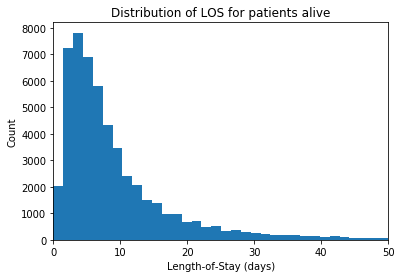

In [17]:
# Plot LOS Distribution
plt.hist(df['LOS'], bins=200)
plt.xlim(0, 50)
plt.title('Distribution of LOS for patients alive')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
plt.show();

In [18]:
df.drop(columns=['DISCHTIME', 'ROW_ID', 
                'EDREGTIME', 'EDOUTTIME', 'HOSPITAL_EXPIRE_FLAG',
                'HAS_CHARTEVENTS_DATA'], inplace=True)

C:\Users\anith\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
df['ETHNICITY'].value_counts()

WHITE                                                       36938
BLACK/AFRICAN AMERICAN                                       5039
UNKNOWN/NOT SPECIFIED                                        3782
HISPANIC OR LATINO                                           1590
ASIAN                                                        1404
OTHER                                                        1389
UNABLE TO OBTAIN                                              655
PATIENT DECLINED TO ANSWER                                    518
ASIAN - CHINESE                                               250
HISPANIC/LATINO - PUERTO RICAN                                220
BLACK/CAPE VERDEAN                                            188
WHITE - RUSSIAN                                               142
MULTI RACE ETHNICITY                                          121
BLACK/HAITIAN                                                  95
ASIAN - ASIAN INDIAN                                           82
HISPANIC/L

In [20]:
df['ETHNICITY'].replace(regex=r'^ASIAN\D*', value='ASIAN', inplace=True)
df['ETHNICITY'].replace(regex=r'^WHITE\D*',value='WHITE', inplace=True)
df['ETHNICITY'].replace(regex=r'^BLACK\D*',value='BLACK/AFRICAN AMERICAN', inplace=True)
df['ETHNICITY'].replace(regex=r'^HISPANIC\D*',value='HISPANIC', inplace=True)
df['ETHNICITY'].replace(['UNKNOWN/NOT SPECIFIED','OTHER','UNABLE TO OBTAIN','PATIENT DECLINED TO ANSWER'],value='OTHER/UNKNOWN', inplace=True)
df['ETHNICITY'].replace(['MULTI RACE ETHNICITY','PORTUGUESE','AMERICAN INDIAN/ALASKA NATIVE','MIDDLE EASTERN ','NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER','CARIBBEAN ISLAND ','SOUTH AMERICAN', 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE','MIDDLE EASTERN','CARIBBEAN ISLAND'],value='MULTI/OTHER ETHENICITIES', inplace=True)
df['ETHNICITY'].value_counts()

C:\Users\anith\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


WHITE                       37235
OTHER/UNKNOWN                6344
BLACK/AFRICAN AMERICAN       5363
HISPANIC                     2006
ASIAN                        1855
MULTI/OTHER ETHENICITIES      301
Name: ETHNICITY, dtype: int64

In [21]:
df['ETHNICITY'].value_counts()

WHITE                       37235
OTHER/UNKNOWN                6344
BLACK/AFRICAN AMERICAN       5363
HISPANIC                     2006
ASIAN                        1855
MULTI/OTHER ETHENICITIES      301
Name: ETHNICITY, dtype: int64

In [22]:
import seaborn as sns

[(0, 100)]

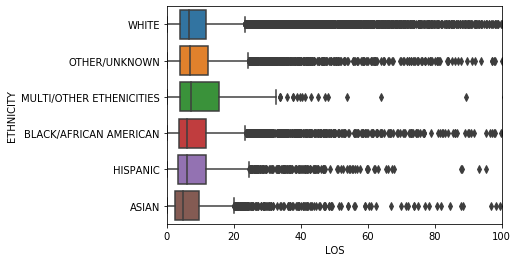

In [23]:
ax=sns.boxplot(x=df['LOS'],y=df['ETHNICITY'])
ax.set(xlim=(0, 100))

In [24]:
df['RELIGION'].value_counts()

CATHOLIC                  18676
NOT SPECIFIED             10816
UNOBTAINABLE               7151
PROTESTANT QUAKER          6473
JEWISH                     4644
OTHER                      2480
EPISCOPALIAN                706
GREEK ORTHODOX              421
CHRISTIAN SCIENTIST         397
                            361
BUDDHIST                    248
MUSLIM                      212
JEHOVAH'S WITNESS           122
UNITARIAN-UNIVERSALIST      106
HINDU                       104
7TH DAY ADVENTIST            76
ROMANIAN EAST. ORTH          72
BAPTIST                      20
HEBREW                       12
METHODIST                     6
LUTHERAN                      1
Name: RELIGION, dtype: int64

[(0, 100)]

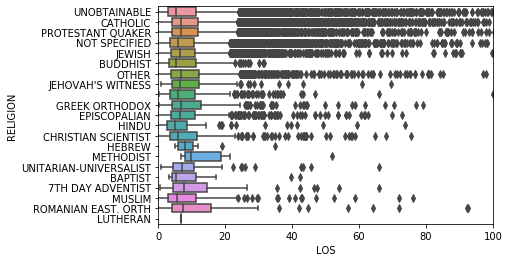

In [25]:
ax=sns.boxplot(x=df['LOS'],y=df['RELIGION'])
ax.set(xlim=(0, 100))

In [26]:
df['ADMISSION_TYPE'].value_counts()

EMERGENCY    36627
NEWBORN       7797
ELECTIVE      7505
URGENT        1175
Name: ADMISSION_TYPE, dtype: int64

[(0, 100)]

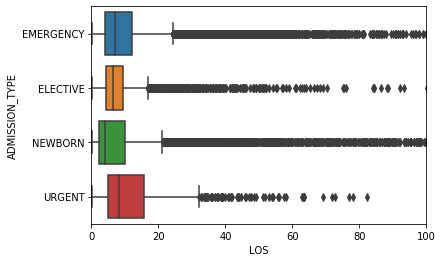

In [27]:
ax=sns.boxplot(x=df['LOS'],y=df['ADMISSION_TYPE'])
ax.set(xlim=(0, 100))

In [28]:
df['INSURANCE'].value_counts()

Medicare      24308
Private       21188
Medicaid       5401
Government     1693
Self Pay        514
Name: INSURANCE, dtype: int64

[(0, 100)]

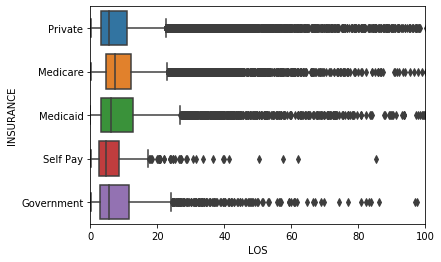

In [29]:
ax=sns.boxplot(x=df['LOS'],y=df['INSURANCE'])
ax.set(xlim=(0, 100))

In [30]:
df['MARITAL_STATUS'].value_counts()

MARRIED              21623
SINGLE               12158
                      9459
WIDOWED               6158
DIVORCED              2894
SEPARATED              517
UNKNOWN (DEFAULT)      280
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64

[(0, 100)]

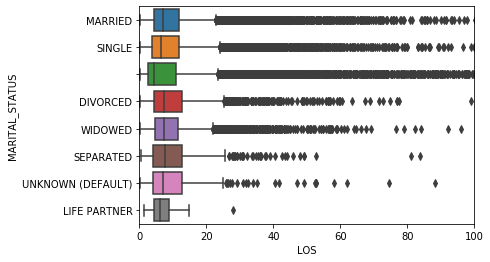

In [31]:
ax=sns.boxplot(x=df['LOS'],y=df['MARITAL_STATUS'])
ax.set(xlim=(0, 100))

### diagnoses_icd

In [32]:
df_ICD = pd.read_sql('select * from diagnoses_icd', conn)
df_ICD.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1,40301
1,1298,109,172335,2,486
2,1299,109,172335,3,58281
3,1300,109,172335,4,5855
4,1301,109,172335,5,4254


In [33]:
df_ICD.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
count,651047,651047,651047,651047,651047
unique,651047,46520,58976,40,6985
top,215026,109,192553,1,4019
freq,1,540,39,58929,20703


In [34]:
df_ICD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
ROW_ID        651047 non-null object
SUBJECT_ID    651047 non-null object
HADM_ID       651047 non-null object
SEQ_NUM       651047 non-null object
ICD9_CODE     651047 non-null object
dtypes: object(5)
memory usage: 24.8+ MB


In [35]:
df_ICD['ICD9_CODE'].describe()

count     651047
unique      6985
top         4019
freq       20703
Name: ICD9_CODE, dtype: object

1. List of ICD-9 codes 001–139: infectious and parasitic diseases
2. List of ICD-9 codes 140–239: neoplasms
3. List of ICD-9 codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
4. List of ICD-9 codes 280–289: diseases of the blood and blood-forming organs
5. List of ICD-9 codes 290–319: mental disorders
6. List of ICD-9 codes 320–389: diseases of the nervous system and sense organs
7. List of ICD-9 codes 390–459: diseases of the circulatory system
8. List of ICD-9 codes 460–519: diseases of the respiratory system
9. List of ICD-9 codes 520–579: diseases of the digestive system
10. List of ICD-9 codes 580–629: diseases of the genitourinary system
11. List of ICD-9 codes 630–679: complications of pregnancy, childbirth, and the puerperium
12. List of ICD-9 codes 680–709: diseases of the skin and subcutaneous tissue
13. List of ICD-9 codes 710–739: diseases of the musculoskeletal system and connective tissue
14. List of ICD-9 codes 740–759: congenital anomalies
15. List of ICD-9 codes 760–779: certain conditions originating in the perinatal period
16. List of ICD-9 codes 780–799: symptoms, signs, and ill-defined conditions
17. List of ICD-9 codes 800–999: injury and poisoning
18. List of ICD-9 codes E and V codes: external causes of injury and supplemental classification
As there are a lot unique ICD codes replaceing the ICD codes with the above

In [36]:
df_ICD['newICD9'] = df_ICD['ICD9_CODE']
df_ICD['newICD9'] = df_ICD['newICD9'][~df_ICD['newICD9'].str.contains("[a-zA-Z]").fillna(False)]


In [37]:
df_ICD['newICD9'] = df_ICD['newICD9'].replace(r'^\s*$', np.NaN, regex=True)
df_ICD['newICD9'].fillna(value='999', inplace=True)
df_ICD

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,newICD9
0,1297,109,172335,1,40301,40301
1,1298,109,172335,2,486,486
2,1299,109,172335,3,58281,58281
3,1300,109,172335,4,5855,5855
4,1301,109,172335,5,4254,4254
...,...,...,...,...,...,...
651042,639798,97503,188195,2,20280,20280
651043,639799,97503,188195,3,V5869,999
651044,639800,97503,188195,4,V1279,999
651045,639801,97503,188195,5,5275,5275


In [38]:
df_ICD['newICD9'] = df_ICD['newICD9'].str.slice(start=0, stop=3, step=1)

df_ICD['newICD9'] .value_counts()

999    98178
401    21329
427    20998
428    20676
276    20440
       ...  
021        1
219        1
116        1
090        1
083        1
Name: newICD9, Length: 845, dtype: int64

In [39]:
df_ICD['newICD9'] = df_ICD['newICD9'].astype(int)
df_ICD['newICD9']

0         403
1         486
2         582
3         585
4         425
         ... 
651042    202
651043    999
651044    999
651045    527
651046    556
Name: newICD9, Length: 651047, dtype: int32

In [40]:
icd9Values = [(1, 140), (140, 240), (240, 280), (280, 290), (290, 320), (320, 390), 
               (390, 460), (460, 520), (520, 580), (580, 630), (630, 680), (680, 710),
               (710, 740), (740, 760), (760, 780), (780, 800), (800, 1000), (1000, 2000)]

diagvalues={0:'infectious and parasitic',1:'neoplasms',2:'Nutritional and Imunity',3:'diseases related to blood',4:'Mental Disodrers',
           5:'Nervous and senses',6:'circulatory',7:'respiratory',8:'digistive',9:'genitourinary',10:'Pregnency',11:'skin',
           12:'musculoskeletal',13:'congenital',14:'prenatal',15:'ill,sysmptoms&signs',16:'inury',17:'External causes of injury'}

for n, r in enumerate(icd9Values):
    df_ICD['newICD9'] = np.where(df_ICD['newICD9'].between(r[0],r[1]), 
            n, df_ICD['newICD9'])
    
df_ICD['newICD9']


0          6
1          7
2          9
3          9
4          6
          ..
651042     1
651043    16
651044    16
651045     8
651046     8
Name: newICD9, Length: 651047, dtype: int32

In [41]:
df_ICD['newICD9'].value_counts()

6     140258
16    140077
2      71711
7      44835
8      38586
9      32796
14     25905
4      24725
15     24027
3      23340
5      23214
0      20268
1      14306
12     12860
11      9312
13      4163
10       664
Name: newICD9, dtype: int64

In [42]:
df_ICD['newICD9'] = df_ICD['newICD9']
df_ICD['cat'] = df_ICD['newICD9'].replace(diagvalues)

In [43]:
df_ICD['cat'].value_counts()

circulatory                  140258
inury                        140077
Nutritional and Imunity       71711
respiratory                   44835
digistive                     38586
genitourinary                 32796
prenatal                      25905
Mental Disodrers              24725
ill,sysmptoms&signs           24027
diseases related to blood     23340
Nervous and senses            23214
infectious and parasitic      20268
neoplasms                     14306
musculoskeletal               12860
skin                           9312
congenital                     4163
Pregnency                       664
Name: cat, dtype: int64

In [44]:
df_ICD.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,newICD9,cat
0,1297,109,172335,1,40301,6,circulatory
1,1298,109,172335,2,486,7,respiratory
2,1299,109,172335,3,58281,9,genitourinary
3,1300,109,172335,4,5855,9,genitourinary
4,1301,109,172335,5,4254,6,circulatory


In [45]:
hadm_list = df_ICD.groupby('HADM_ID')['cat'].apply(list).reset_index()
hadm_list.head()

,HADM_ID,cat
0,100001,"[Nutritional and Imunity, Nervous and senses, ..."
1,100003,"[digistive, diseases related to blood, infecti..."
2,100006,"[respiratory, respiratory, respiratory, neopla..."
3,100007,"[digistive, digistive, inury, respiratory, cir..."
4,100009,"[circulatory, inury, circulatory, Nutritional ..."


In [46]:
hadmcatagories = pd.get_dummies(hadm_list['cat'].apply(pd.Series).stack()).sum(level=0)
hadmcatagories.head()

,Mental Disodrers,Nervous and senses,Nutritional and Imunity,Pregnency,circulatory,congenital,digistive,diseases related to blood,genitourinary,"ill,sysmptoms&signs",infectious and parasitic,inury,musculoskeletal,neoplasms,prenatal,respiratory,skin
0,0,2,5,0,2,0,2,0,2,0,0,2,0,0,0,0,1
1,0,0,0,0,2,0,4,1,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,0,2,0,1,0,3,0
3,0,0,0,0,1,0,2,0,0,0,0,1,0,0,0,1,0
4,0,0,3,0,7,0,0,1,0,0,0,7,0,0,0,0,0


In [47]:
hadmcatagories=hadmcatagories.join(hadm_list['HADM_ID'],how="outer")

In [48]:
hadmcatagories

,Mental Disodrers,Nervous and senses,Nutritional and Imunity,Pregnency,circulatory,congenital,digistive,diseases related to blood,genitourinary,"ill,sysmptoms&signs",infectious and parasitic,inury,musculoskeletal,neoplasms,prenatal,respiratory,skin,HADM_ID
0,0,2,5,0,2,0,2,0,2,0,0,2,0,0,0,0,1,100001
1,0,0,0,0,2,0,4,1,0,1,1,0,0,0,0,0,0,100003
2,1,0,1,0,0,0,0,0,0,1,0,2,0,1,0,3,0,100006
3,0,0,0,0,1,0,2,0,0,0,0,1,0,0,0,1,0,100007
4,0,0,3,0,7,0,0,1,0,0,0,7,0,0,0,0,0,100009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,3,0,199993
58972,0,0,1,0,4,0,0,0,1,0,0,0,0,0,0,3,0,199994
58973,3,0,0,0,4,1,0,0,0,0,1,1,0,0,0,0,0,199995
58974,0,0,2,0,7,0,0,0,0,1,0,5,0,0,0,1,0,199998


In [49]:
df=df.merge(hadmcatagories, how='inner', on='HADM_ID')

In [50]:
df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,...,diseases related to blood,genitourinary,"ill,sysmptoms&signs",infectious and parasitic,inury,musculoskeletal,neoplasms,prenatal,respiratory,skin
0,22,165315,2196-04-09 12:26:00,,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,,UNOBTAINABLE,...,0,0,0,0,4,0,0,0,0,0
1,23,152223,2153-09-03 07:15:00,,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,,CATHOLIC,...,0,1,0,0,1,0,0,0,0,0
2,23,124321,2157-10-18 19:34:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,...,0,0,0,0,3,0,1,1,0,0
3,24,161859,2139-06-06 16:14:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,,PROTESTANT QUAKER,...,0,0,0,0,0,0,0,0,0,0
4,25,129635,2160-11-02 02:06:00,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,,UNOBTAINABLE,...,0,0,0,0,0,0,0,0,0,0


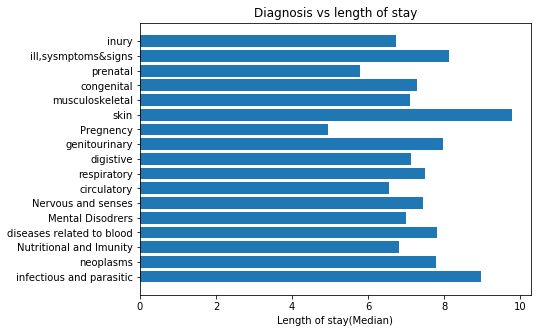

In [51]:
diaglist = ['infectious and parasitic','neoplasms','Nutritional and Imunity','diseases related to blood','Mental Disodrers',
           'Nervous and senses','circulatory','respiratory','digistive','genitourinary','Pregnency','skin',
           'musculoskeletal','congenital','prenatal','ill,sysmptoms&signs','inury']

result = []
for var in diaglist:
    result.append(df[[var, 'LOS']].groupby(var).median().reset_index().values[1][1])

fig, ax = plt.subplots(figsize=(7,5))
length = range(len(result))
ax.barh(length, result )
ax.set_yticks(length)
ax.set_yticklabels(diaglist)
ax.set_xlabel('Length of stay(Median)')
ax.set_title('Diagnosis vs length of stay')
plt.show();

### patients table

In [52]:
df_pat = pd.read_sql('select * from patients', conn)


In [53]:
df_pat.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,,,,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,,1
2,236,251,M,2090-03-15 00:00:00,,,,0
3,237,252,M,2078-03-06 00:00:00,,,,0
4,238,253,F,2089-11-26 00:00:00,,,,0


In [54]:
df_pat.describe()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
count,46520,46520,46520,46520,46520,46520,46520,46520
unique,46520,46520,2,32540,12912,8748,11302,2
top,14036,15180,M,2051-06-19 00:00:00,,,,0
freq,1,1,26121,7,30761,36546,33142,30761


### we dont need the info regarding the death so create a table dropping related info regarding death

In [55]:
df_pat['GENDER'].value_counts()

M    26121
F    20399
Name: GENDER, dtype: int64

In [56]:
df2=df_pat[['SUBJECT_ID','GENDER','DOB']]
df2.head()

,SUBJECT_ID,GENDER,DOB
0,249,F,2075-03-13 00:00:00
1,250,F,2164-12-27 00:00:00
2,251,M,2090-03-15 00:00:00
3,252,M,2078-03-06 00:00:00
4,253,F,2089-11-26 00:00:00


In [57]:
df=df.merge(df2,how='inner',on='SUBJECT_ID')
df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,...,"ill,sysmptoms&signs",infectious and parasitic,inury,musculoskeletal,neoplasms,prenatal,respiratory,skin,GENDER,DOB
0,22,165315,2196-04-09 12:26:00,,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,,UNOBTAINABLE,...,0,0,4,0,0,0,0,0,F,2131-05-07 00:00:00
1,23,152223,2153-09-03 07:15:00,,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,,CATHOLIC,...,0,0,1,0,0,0,0,0,M,2082-07-17 00:00:00
2,23,124321,2157-10-18 19:34:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,...,0,0,3,0,1,1,0,0,M,2082-07-17 00:00:00
3,24,161859,2139-06-06 16:14:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,,PROTESTANT QUAKER,...,0,0,0,0,0,0,0,0,M,2100-05-31 00:00:00
4,25,129635,2160-11-02 02:06:00,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,,UNOBTAINABLE,...,0,0,0,0,0,0,0,0,M,2101-11-21 00:00:00


### As we have date of birth we can calculate age of patients
there are multiple admissions we have to find first admission

In [58]:
dfage = df[['SUBJECT_ID', 'ADMITTIME']].groupby('SUBJECT_ID').min().reset_index()
dfage.columns = ['SUBJECT_ID', 'FIRSTADM']
dfage

,SUBJECT_ID,FIRSTADM
0,10,2103-06-28 11:36:00
1,100,2157-08-10 07:15:00
2,10000,2186-08-10 21:57:00
3,10001,2107-03-18 15:48:00
4,10002,2183-03-16 18:50:00
...,...,...
42116,99985,2181-01-27 02:47:00
42117,99991,2184-12-24 08:30:00
42118,99992,2144-07-25 18:03:00
42119,99995,2147-02-08 08:00:00


In [59]:
df = df.merge(dfage, how='outer', on='SUBJECT_ID')

In [60]:
df['FIRSTADM'].value_counts()

2181-11-18 19:44:00    42
2125-07-10 04:01:00    34
2137-11-04 19:36:00    33
2178-07-21 02:18:00    31
2101-04-01 01:13:00    24
                       ..
2129-01-05 17:08:00     1
2135-10-09 20:27:00     1
2109-04-28 21:21:00     1
2166-02-04 13:15:00     1
2191-09-20 16:17:00     1
Name: FIRSTADM, Length: 41902, dtype: int64

In [61]:
df['FIRSTADM'] = pd.to_datetime(df['FIRSTADM']).dt.date
type(df['FIRSTADM'])
df['FIRSTADM'].value_counts()

2181-11-18    43
2125-07-10    36
2137-11-04    33
2178-07-21    31
2101-04-01    24
              ..
2100-07-07     1
2176-05-29     1
2183-09-16     1
2166-07-01     1
2172-01-19     1
Name: FIRSTADM, Length: 25011, dtype: int64

In [62]:
df['DOB'] = pd.to_datetime(df['DOB']).dt.date
type(df['DOB'])
df['DOB'].value_counts()

2148-04-23    43
2105-05-05    36
2117-08-07    35
2144-09-28    31
2039-03-10    25
              ..
2103-06-20     1
2198-11-19     1
2166-08-16     1
2113-04-29     1
1838-07-25     1
Name: DOB, Length: 30285, dtype: int64

In [63]:
df['age'] = (df['FIRSTADM'] - df['DOB'])

In [64]:
df['age']=df['age']/365

In [65]:
df['age'] = df['age'].astype(str).str[:3]
print(df['age'] )

0        64 
1        71 
2        71 
3        39 
4        58 
        ... 
53099    80 
53100    53 
53101    78 
53102    19 
53103    42 
Name: age, Length: 53104, dtype: object


In [66]:
df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,...,inury,musculoskeletal,neoplasms,prenatal,respiratory,skin,GENDER,DOB,FIRSTADM,age
0,22,165315,2196-04-09 12:26:00,,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,,UNOBTAINABLE,...,4,0,0,0,0,0,F,2131-05-07,2196-04-09,64
1,23,152223,2153-09-03 07:15:00,,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,,CATHOLIC,...,1,0,0,0,0,0,M,2082-07-17,2153-09-03,71
2,23,124321,2157-10-18 19:34:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,...,3,0,1,1,0,0,M,2082-07-17,2153-09-03,71
3,24,161859,2139-06-06 16:14:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,,PROTESTANT QUAKER,...,0,0,0,0,0,0,M,2100-05-31,2139-06-06,39
4,25,129635,2160-11-02 02:06:00,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,,UNOBTAINABLE,...,0,0,0,0,0,0,M,2101-11-21,2160-11-02,58


In [67]:
df['age'] = pd.to_numeric(df['age'], errors='coerce').fillna(0).astype(int)
#df['age']

In [68]:
df['age'] = np.where(df['age'] < 0, 90, df['age'])

In [69]:
#dropping age greater than 90
df = df[df['age'] <=90] 

In [70]:
df['age'].value_counts()

0     8042
62    1017
77     976
69     975
66     955
      ... 
17      63
89      25
16      20
15       7
14       1
Name: age, Length: 77, dtype: int64

In [71]:
df['age'].isnull().sum()

0

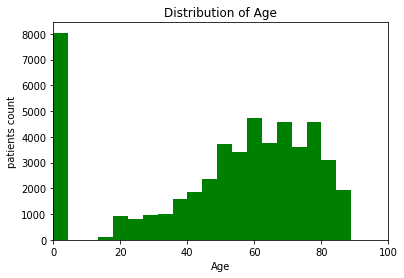

In [72]:
plt.hist(df['age'], bins=20, color='green')
plt.xlim(0,100)
plt.ylabel('patients count')
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show();

Text(0.5, 1.0, 'Distribution of LOS vs age')

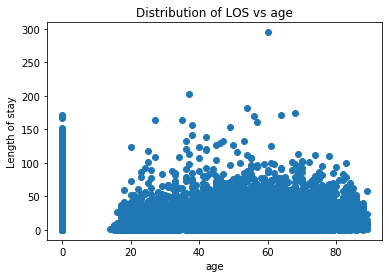

In [73]:
plt.scatter(x=df['age'],y=df['LOS'])
plt.xlabel("age")
plt.ylabel("Length of stay")
plt.title("Distribution of LOS vs age")

In [74]:
ages = [(0, 13), (13, 36), (36, 56), (56, 100)]
for n, r in enumerate(ages):
    df['age'] = np.where(df['age'].between(r[0],r[1]), 
            n, df['age'])
    
age_dict = {0: 'newborn', 1: 'young_adult', 2: 'middle_adult', 3: 'senior'}
df['age'] = df['age'].replace(age_dict)
df['age'].value_counts()

senior          27208
middle_adult    11752
newborn          8042
young_adult      4035
Name: age, dtype: int64

[(0, 100)]

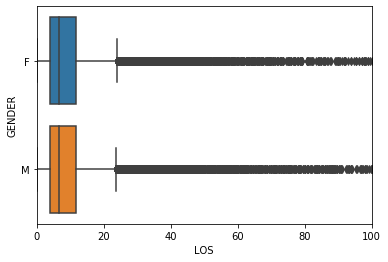

In [75]:
ax=sns.boxplot(x=df['LOS'],y=df['GENDER'])
ax.set(xlim=(0, 100))

In [76]:
gender = ['M', 'F']
for n, r in enumerate(gender):
    df['GENDER'] = np.where(df['GENDER']==r, n, df['GENDER'])
    
gender_dict = {0: '0', 1: '1'}
df['GENDER'] = df['GENDER'].replace(gender_dict)
df['GENDER'].value_counts()

0    29019
1    22018
Name: GENDER, dtype: int64

In [77]:
df_icu = pd.read_sql('select * from icustays', conn)

In [78]:
df_icu.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.249
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.06
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [79]:
df_icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
ROW_ID            61532 non-null object
SUBJECT_ID        61532 non-null object
HADM_ID           61532 non-null object
ICUSTAY_ID        61532 non-null object
DBSOURCE          61532 non-null object
FIRST_CAREUNIT    61532 non-null object
LAST_CAREUNIT     61532 non-null object
FIRST_WARDID      61532 non-null object
LAST_WARDID       61532 non-null object
INTIME            61532 non-null object
OUTTIME           61532 non-null object
LOS               61532 non-null object
dtypes: object(12)
memory usage: 5.6+ MB


In [80]:
df_icu.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
count,61532,61532,61532,61532,61532,61532,61532,61532,61532,61532,61532,61532
unique,61532,46476,57786,61532,3,6,6,16,17,61531,61519,40176
top,14036,13033,186706,215026,carevue,MICU,MICU,52,52,2112-07-18 10:56:00,,
freq,1,41,7,1,37776,21088,21310,8482,8077,2,10,10


In [81]:
df_icu['HADM_ID'].nunique()

57786

In [82]:
df_icu.groupby('FIRST_CAREUNIT')

In [83]:
df_icu['FIRST_CAREUNIT'].replace({'CCU': 'ICU', 'CSRU': 'ICU', 'MICU': 'ICU',
                                  'SICU': 'ICU', 'TSICU': 'ICU'}, inplace=True)
df_icu['FIRST_CAREUNIT'].value_counts()

ICU     53432
NICU     8100
Name: FIRST_CAREUNIT, dtype: int64

In [84]:
icu_list = df_icu.groupby('HADM_ID')['FIRST_CAREUNIT'].apply(list).reset_index()

In [85]:
icu_list.head()

,HADM_ID,FIRST_CAREUNIT
0,100001,[ICU]
1,100003,[ICU]
2,100006,[ICU]
3,100007,[ICU]
4,100009,[ICU]


In [86]:
icu_item = pd.get_dummies(icu_list['FIRST_CAREUNIT'].apply(pd.Series).stack()).sum(level=0)
icu_item[icu_item >= 1] = 1
icu_item = icu_item.join(icu_list['HADM_ID'], how="outer")
icu_item.head()

,ICU,NICU,HADM_ID
0,1,0,100001
1,1,0,100003
2,1,0,100006
3,1,0,100007
4,1,0,100009


In [87]:
icu_item['ICU'].value_counts()

1    49794
0     7992
Name: ICU, dtype: int64

In [88]:
icu_item['NICU'].value_counts()

0    49794
1     7992
Name: NICU, dtype: int64

In [89]:
df = df.merge(icu_item, how='outer', on='HADM_ID')

In [90]:
df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,...,neoplasms,prenatal,respiratory,skin,GENDER,DOB,FIRSTADM,age,ICU,NICU
0,22,165315,2196-04-09 12:26:00,,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,,UNOBTAINABLE,...,0.0,0.0,0.0,0.0,1,2131-05-07,2196-04-09,senior,1.0,0.0
1,23,152223,2153-09-03 07:15:00,,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,,CATHOLIC,...,0.0,0.0,0.0,0.0,0,2082-07-17,2153-09-03,senior,1.0,0.0
2,23,124321,2157-10-18 19:34:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,...,1.0,1.0,0.0,0.0,0,2082-07-17,2153-09-03,senior,1.0,0.0
3,24,161859,2139-06-06 16:14:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,,PROTESTANT QUAKER,...,0.0,0.0,0.0,0.0,0,2100-05-31,2139-06-06,middle_adult,1.0,0.0
4,25,129635,2160-11-02 02:06:00,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,,UNOBTAINABLE,...,0.0,0.0,0.0,0.0,0,2101-11-21,2160-11-02,senior,1.0,0.0


In [91]:
df['ICU'].fillna(value=0, inplace=True)
df['NICU'].fillna(value=0, inplace=True)

In [92]:
print(df.ICU.value_counts(dropna=False))
print(df.NICU.value_counts(dropna=False))

1.0    49794
0.0     9100
Name: ICU, dtype: int64
0.0    50902
1.0     7992
Name: NICU, dtype: int64


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58894 entries, 0 to 58893
Data columns (total 37 columns):
SUBJECT_ID                   51037 non-null object
HADM_ID                      58894 non-null object
ADMITTIME                    51037 non-null datetime64[ns]
DEATHTIME                    51037 non-null object
ADMISSION_TYPE               51037 non-null object
ADMISSION_LOCATION           51037 non-null object
DISCHARGE_LOCATION           51037 non-null object
INSURANCE                    51037 non-null object
LANGUAGE                     51037 non-null object
RELIGION                     51037 non-null object
MARITAL_STATUS               51037 non-null object
ETHNICITY                    51037 non-null object
DIAGNOSIS                    51037 non-null object
LOS                          51037 non-null float64
Mental Disodrers             51037 non-null float64
Nervous and senses           51037 non-null float64
Nutritional and Imunity      51037 non-null float64
Pregnency   

In [94]:
#removing unncessary columns not used for predicting LOS
df.drop(columns=['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'ADMISSION_LOCATION',
                'DISCHARGE_LOCATION', 'DEATHTIME','LANGUAGE', 'FIRSTADM', 'DOB',
                'DIAGNOSIS'], inplace=True)


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58894 entries, 0 to 58893
Data columns (total 27 columns):
ADMISSION_TYPE               51037 non-null object
INSURANCE                    51037 non-null object
RELIGION                     51037 non-null object
MARITAL_STATUS               51037 non-null object
ETHNICITY                    51037 non-null object
LOS                          51037 non-null float64
Mental Disodrers             51037 non-null float64
Nervous and senses           51037 non-null float64
Nutritional and Imunity      51037 non-null float64
Pregnency                    51037 non-null float64
circulatory                  51037 non-null float64
congenital                   51037 non-null float64
digistive                    51037 non-null float64
diseases related to blood    51037 non-null float64
genitourinary                51037 non-null float64
ill,sysmptoms&signs          51037 non-null float64
infectious and parasitic     51037 non-null float64
inury       

In [96]:
cols = ['Admission_Type', 'insurance', 'Ethnicity', 'Age','Martial_status', 'Religion']
dummycols = ['ADMISSION_TYPE', 'INSURANCE','ETHNICITY',
              'age','MARITAL_STATUS','RELIGION']
df = pd.get_dummies(df, prefix=cols, columns=dummycols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58894 entries, 0 to 58893
Data columns (total 69 columns):
LOS                                   51037 non-null float64
Mental Disodrers                      51037 non-null float64
Nervous and senses                    51037 non-null float64
Nutritional and Imunity               51037 non-null float64
Pregnency                             51037 non-null float64
circulatory                           51037 non-null float64
congenital                            51037 non-null float64
digistive                             51037 non-null float64
diseases related to blood             51037 non-null float64
genitourinary                         51037 non-null float64
ill,sysmptoms&signs                   51037 non-null float64
infectious and parasitic              51037 non-null float64
inury                                 51037 non-null float64
musculoskeletal                       51037 non-null float64
neoplasms                            

In [97]:
df['genitourinary'].value_counts()

0.0    33925
1.0    10928
2.0     4367
3.0     1378
4.0      313
5.0       91
6.0       27
7.0        8
Name: genitourinary, dtype: int64

### Length of stay model prediction

In [98]:
df=df.dropna()

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df))
MinMaxScaler()
print(scaler.data_max_)
Transform = scaler.transform(df)

MinMaxScaler(copy=True, feature_range=(0, 1))
[294.66041667  11.           8.          12.          13.
  16.          11.          11.           6.           7.
   8.           7.          23.           7.          10.
  16.           9.           9.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.        ]


In [100]:
X= Transform[:,1:69]
print(X) 
X = pd.DataFrame(X)
#target attribute is fitted into a dataframe
Y = df['LOS']
Y

[[0.09090909 0.125      0.         ... 0.         0.         1.        ]
 [0.         0.125      0.08333333 ... 0.         0.         0.        ]
 [0.         0.125      0.16666667 ... 0.         0.         0.        ]
 ...
 [0.         0.125      0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.41666667 ... 0.         0.         0.        ]]


0         1.144444
1         5.496528
2         6.768056
3         2.856944
4         3.534028
           ...    
51032    10.794444
51033    10.572917
51034     4.145833
51035     2.742361
51036     8.203472
Name: LOS, Length: 51037, dtype: float64

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = .20, 
                                                    random_state = 0)

In [102]:
print(X_train.shape[0])
print(X_test.shape[0])

40829
10208


In [103]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
36070,0.000000,0.125,0.250000,0.0,0.125,0.000000,0.090909,0.166667,0.285714,0.000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17139,0.000000,0.000,0.000000,0.0,0.000,0.090909,0.000000,0.000000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19484,0.000000,0.000,0.000000,0.0,0.000,0.090909,0.000000,0.000000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34802,0.090909,0.000,0.166667,0.0,0.000,0.000000,0.181818,0.000000,0.142857,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23582,0.000000,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [104]:

# Regression models for comparison
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_test_preds)
    print('{} done.'.format(name))

SGDRegressor done.
GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.


C:\Users\anith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor done.


Text(0.5, 1.0, 'Comparison of Regression Models')

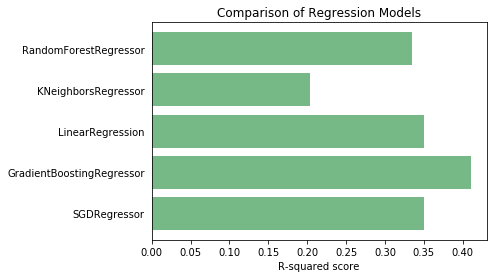

In [105]:
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')

In [106]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[11469    89  4516 ... 10830  4498 16947]
continuous
multiclass
multiclass


In [107]:
from sklearn.ensemble import RandomForestClassifier  
classify = RandomForestClassifier(n_estimators=10, random_state=0)
rf= classify.fit(X_train,y_train.values.ravel())
random_forest_accuracy= rf.score(X_test, Y_test)
random_forest_accuracy

ValueError: Unknown label type: 'continuous'